<a href="https://colab.research.google.com/github/zihoonkim/inf_car_number/blob/main/beginner_style_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리를 import 합니다.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# load_data() 함수를 이용해서 mnist 데이터를 불러옵니다.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 픽셀 range를 0~255에서 0~1로 변경합니다.
print(type(x_train))
print(type(y_train))

11501568/11490434 [==============================] - 0s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(x_train.shape) # 6만장 데이터에 28 x 28 사이즈의 이미지
print(y_train.shape)
print(x_test.shape)  # 만장의 테스트 이미지
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 데이터의 일부를 살펴봅시다.

정답 label : 5


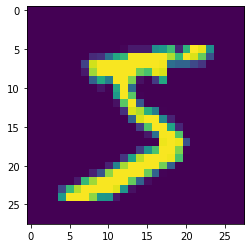

In [4]:
plt.imshow(x_train[0])
print('정답 label :', y_train[0])

정답 label : 0


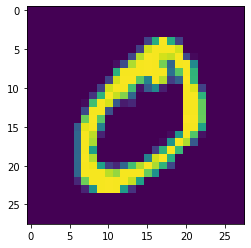

In [5]:
plt.imshow(x_train[1])
print('정답 label :', y_train[1])

# ANN 모델을 하나 정의합니다.

In [6]:
# beginners 스타일 모델 구현 Sequential
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), ## 28x28 을 784로 flatten
  tf.keras.layers.Dense(128, activation='relu'), # 히든 128개의 노드로
  tf.keras.layers.Dense(10, activation='softmax') # 마지막 softmax로
])

# 손실함수와 옵티마이저를 정의합니다.

In [7]:
model.compile(optimizer='sgd',  ## compile 매소드 실행 sgd, adam 등 
              loss='sparse_categorical_crossentropy', # 원핫 인코딩을 자동으로 적용한뒤 크로스엔트로피 적용 
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6364 - accuracy: 0.8389
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3393 - accuracy: 0.9048
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2915 - accuracy: 0.9177
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2618 - accuracy: 0.9262
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2394 - accuracy: 0.9331


# test 데이터에 대한 mnist 모델의 정확도를 출력합니다.

In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2250 - accuracy: 0.9378 - 875ms/epoch - 3ms/step


[0.2249605506658554, 0.9377999901771545]

예측값 : 6
정답 : 6


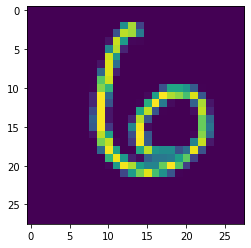

In [10]:
plt.imshow(x_test[100])
predictions = model.predict(x_test[100:101]) # 한장에 대한 예측 predict
print('예측값 :', np.argmax(predictions[0])) # 하나로 정답을 정하기 위해서 argmax(최대값 위치)
print('정답 :', y_test[100])

In [11]:
predictions

array([[1.5085132e-03, 1.9599851e-03, 2.3073183e-02, 2.4371047e-03,
        2.3085007e-03, 1.0997445e-03, 9.6144569e-01, 7.6845591e-04,
        4.5076152e-03, 8.9114730e-04]], dtype=float32)

예측값 : 0
정답 : 0


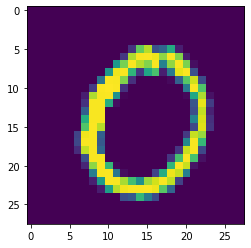

In [13]:
plt.imshow(x_test[101])
predictions = model.predict(x_test[101:102]) 
print('예측값 :', np.argmax(predictions[0])) 
print('정답 :', y_test[101])